<a href="https://colab.research.google.com/github/rachel1818/Gender-Cclassification/blob/main/Gender_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from nltk.corpus import names
import random
import nltk
import numpy as np
from sklearn.naive_bayes import GaussianNB 
from sklearn.model_selection import cross_validate 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns

The way the cross validation was included was wrong and the model_selection was supposed to be included to import cross validation

In [ ]:
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

In [ ]:
print(gender_features2('Shrek'))

{'first_letter': 's', 'last_letter': 'k', 'count(a)': 0, 'has(a)': False, 'count(b)': 0, 'has(b)': False, 'count(c)': 0, 'has(c)': False, 'count(d)': 0, 'has(d)': False, 'count(e)': 1, 'has(e)': True, 'count(f)': 0, 'has(f)': False, 'count(g)': 0, 'has(g)': False, 'count(h)': 1, 'has(h)': True, 'count(i)': 0, 'has(i)': False, 'count(j)': 0, 'has(j)': False, 'count(k)': 1, 'has(k)': True, 'count(l)': 0, 'has(l)': False, 'count(m)': 0, 'has(m)': False, 'count(n)': 0, 'has(n)': False, 'count(o)': 0, 'has(o)': False, 'count(p)': 0, 'has(p)': False, 'count(q)': 0, 'has(q)': False, 'count(r)': 1, 'has(r)': True, 'count(s)': 1, 'has(s)': True, 'count(t)': 0, 'has(t)': False, 'count(u)': 0, 'has(u)': False, 'count(v)': 0, 'has(v)': False, 'count(w)': 0, 'has(w)': False, 'count(x)': 0, 'has(x)': False, 'count(y)': 0, 'has(y)': False, 'count(z)': 0, 'has(z)': False}


In [ ]:
nltk.download('names')

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


True

***SHUFFLING THE LABELED NAMES AND VIEWING THEM IN A DATAFRAME USING PANDAS***

In [ ]:
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
	[(name, 'female') for name in names.words('female.txt')])

random.shuffle(labeled_names)

In [ ]:
pd.DataFrame(labeled_names)

,0,1
0,Alvinia,female
1,Celestina,female
2,Viole,female
3,Averyl,female
4,Abbey,female
...,...,...
7939,Jillene,female
7940,Flor,female
7941,Aloisia,female
7942,Malissa,female


In [ ]:
labeled = pd.DataFrame(labeled_names)

***LABELING OF THE COLUMNS OF THE DATAFRAME***

In [ ]:
labeled = labeled.rename(columns={0: "Names", 1: "Gender"})
labeled.head()

,Names,Gender
0,Aharon,male
1,Rudiger,male
2,Christen,female
3,Cammy,female
4,Leonelle,female


***SPLITTING OF THE DATASET***

In [ ]:
X = labeled['Names'].values
y = labeled['Gender'].values

In [ ]:
pd.DataFrame(X).head()

,0
0,Aharon
1,Rudiger
2,Christen
3,Cammy
4,Leonelle


***TRANSFORMING OF THE GENDER COLUMN*** 

In [ ]:
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [ ]:
pd.DataFrame(y).head()

,0
0,1
1,1
2,0
3,0
4,0


## **FEATURE ENGINEERING**
***TRANSFORMATION OF THE TEXT USING BAG OF WORDS***

In [ ]:
count = CountVectorizer(min_df=3, analyzer='word', ngram_range=(1,2), max_features=5000) #CONSIDERING BOTH BIGRAMS AND UNIGRAMS, IGNORING WORDS THAT HAVE A DOCUMENT FREQUENCY OF LESS THAN 3 AND CONSIDERING THE TOP 5000 FEATURES BASED ON FREQUENCY ACROSS THE CORPUS.
bow = count.fit_transform(X)
bow.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
Bow_feature_names = count.get_feature_names()

In [ ]:
X_Bow = pd.DataFrame(bow.toarray(), columns=Bow_feature_names) #VIEWING IN FORM OF A DATAFRAME

In [ ]:
X_Bow.head()

,ann,anna,anne,diane,gale,grace,holly,jean,jo,john,lane,lou,lynn,marie,terri
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


***TRANSFORMATION OF THE TEXT USING TF-IDF***

In [ ]:
tf = TfidfVectorizer(analyzer='word',min_df= 3, ngram_range=(1, 2), max_features=5000)
Tfid = tf.fit_transform(X)
Tfid.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfid_feature_names = tf.get_feature_names()
X_Tfid = pd.DataFrame(Tfid.toarray(), columns=tfid_feature_names)
X_Tfid.head()

,ann,anna,anne,diane,gale,grace,holly,jean,jo,john,lane,lou,lynn,marie,terri
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## ***MODELLING***

In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
rf_reg = RandomForestClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
RandomForest_Bow = np.mean(scores)
print('Average K-Fold(Random Forest- BOW) Score :' , RandomForest_Bow)

Scores from each Iteration:  [0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6276729559748427, 0.6276729559748427, 0.6289308176100629, 0.6289308176100629, 0.6276729559748427, 0.6289308176100629]
Average K-Fold(Random Forest- BOW) Score : 0.6285534591194968


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
rf_reg = RandomForestClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = rf_reg.fit(X_train,y_train)
    predictions = rf_reg.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
RandomForest_Tfid = np.mean(scores)
print('Average K-Fold Score(Random Forest- TFid) :' , RandomForest_Tfid)

Scores from each Iteration:  [0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6276729559748427, 0.6289308176100629, 0.6289308176100629, 0.6276729559748427, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629]
Average K-Fold Score(Random Forest- TFid) : 0.6286792452830188


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
clf = GaussianNB()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
GaussianNB_Bow = np.mean(scores)
print('Average K-Fold(Random Forest- BOW) Score :' , GaussianNB_Bow)

Scores from each Iteration:  [0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733]
Average K-Fold(Random Forest- BOW) Score : 0.3735849056603774


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
clf = GaussianNB()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
GaussianNB_Tfid = np.mean(scores)
print('Average K-Fold Score(Random Forest- TFid) :' , GaussianNB_Tfid)

Scores from each Iteration:  [0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733, 0.37358490566037733]
Average K-Fold Score(Random Forest- TFid) : 0.3735849056603774


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
dtc = DecisionTreeClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = dtc.fit(X_train,y_train)
    predictions = dtc.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
DecisionTree_Tfid = np.mean(scores)
print('Average K-Fold Score(Decision Tree- TFid) :' , DecisionTree_Tfid)

Scores from each Iteration:  [0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629]
Average K-Fold Score(Decision Tree- TFid) : 0.6289308176100629


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
dtc = DecisionTreeClassifier()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = dtc.fit(X_train,y_train)
    predictions = dtc.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
DecisionTree_Bow = np.mean(scores)
print('Average K-Fold Score(Decision Tree- BOW) :' , DecisionTree_Bow)


Scores from each Iteration:  [0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629]
Average K-Fold Score(Decision Tree- BOW) : 0.6289308176100629


In [ ]:

f = KFold(n_splits = 10, shuffle = False, random_state=None)
clf = SVC()

scores = []
for i in range(10):
    result = next(kf.split(X_Bow), None)
    X_train = X_Bow.iloc[result[0]]
    X_test = X_Bow.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
SVM_Bow = np.mean(scores)
print('Average K-Fold Score(SVM- BOW) :' , SVM_Bow)


Scores from each Iteration:  [0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629]
Average K-Fold Score(SVM- BOW) : 0.6289308176100629


In [ ]:
kf = KFold(n_splits = 10, shuffle = False, random_state=None)
clf = SVC()

scores = []
for i in range(10):
    result = next(kf.split(X_Tfid), None)
    X_train = X_Tfid.iloc[result[0]]
    X_test = X_Tfid.iloc[result[1]]
    y_train = y[result[0]]
    y_test = y[result[1]]
    model = clf.fit(X_train,y_train)
    predictions = clf.predict(X_test)
    scores.append(model.score(X_test,y_test))
print('Scores from each Iteration: ', scores)
SVM_Tfid = np.mean(scores)
print('Average K-Fold Score(SVM- TFid) :' , SVM_Tfid)


Scores from each Iteration:  [0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629, 0.6289308176100629]
Average K-Fold Score(SVM- TFid) : 0.6289308176100629


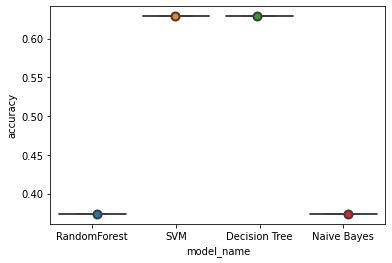

In [ ]:
entries = [('RandomForest', RandomForest_Tfid),('SVM', SVM_Tfid), ('Decision Tree', DecisionTree_Tfid), ('Naive Bayes', GaussianNB_Tfid)]
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

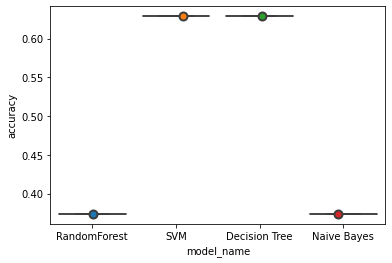

In [ ]:
entries = [('RandomForest', RandomForest_Bow),('SVM', SVM_Bow), ('Decision Tree', DecisionTree_Bow),('Naive Bayes', GaussianNB_Bow)]
cv_df = pd.DataFrame(entries, columns=['model_name', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()